In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
# from utils import *
%run utils-2D.py
plt.rcParams['text.usetex'] = True 

In [8]:

init_params={
    'v' : 3,                    # Wave speed
    'theta_resolution' : 1,     # degrees
    'tolerance' : 0.05,         # Detection threshold
    'r_s' :     50,                # r of source
    'theta_s' : np.deg2rad(60) ,      # theta of source
    'd': 30,       #rescale with r_s*     # radially symmetric receptor positions
    'r1_amp':15,                 # amplitude of outR1
    'r2_amp':15,                  # amplitude of outR2
    'r1_theta': 0,
    'r2_theta': np.pi,
    }
init_params.update({'R1cart':polar2cart(init_params['d'], init_params['r1_theta']),
                    'R2cart':polar2cart(init_params['d'], init_params['r2_theta']),
                    'Scart': polar2cart(init_params['r_s'],init_params['r_s'] ),
                    })

time_prms = {
    'dt' : 0.001,                # Time step
    'tmax' : 100,              # Simulation duration
    'pulses' : 10,               # Period between source emissions
    'width' : 200,               # time width of pulse window
}
INeuron={
    'V0': -70,
    'Vq': -55,
    'w1': 5,
    'w2':5, 
    'tau':1,
    'rf': 100,
    'lag':300,
    'outAmp':20,
    'I1': 'outR1',
    'I2': 'outR2'
}
O1Neuron = {
    'id': 'O1',
    'V0': -70,
    'Vq': -55,
    'w1': 10,
    'w2': 10,
    'tau': 1, 
    'rf':300,
    't0': 0, 
    'tf': 10,
    'lag':500,
    'I1': 'outR1',
    'I2': 'outI',
    'outAmp': 20
    }
O2Neuron = {
    'id': 'O2',
    'V0': -70,
    'Vq': -55,
    'w1': 10,
    'w2': 10,
    'tau': 1, 
    'rf':300,
    't0': 0, 
    'tf': 10,
    'lag':500,
    'I1': 'outR2',
    'I2': 'outI',
    'outAmp': 20
    }

In [9]:
# %run utils-2D.py
# time = np.arange(0, time_prms['tmax'], time_prms['dt'])
# emissionIdx, outS, startIdx = Source(time, time_prms)
# # df = pd.DataFrame({'time':time,
# #                     'S': outS,
# #                     # 'outR1': np.zeros_like[time],
# #                     # 'outR2': np.zeros_like[time],
# #                     # 'outI':  np.zeros_like[time],
# #                     # 'outO1': np.zeros_like[time], 
# #                     # 'outO2': np.zeros_like[time]
# #                     })

# df0 = pd.DataFrame()
# Vdf0 = pd.DataFrame()

# # for i, t in enumerate(tqdm(startIdx[:-1])): 
# #     stopIdx = startIdx[i+1]
# #     newtime = time[t:stopIdx]
# #     outS_new = outS[i: stopIdx]
# #     indices = np.where(outS_new == 1)[0]
# #     for nt in tqdm(newtime):
# #         df_nt, Vdf_nt = FindSource(newtime, newtime[indices],outS, 
# #                                 init_params,time_prms, 
# #                                 INeuron, O1Neuron, O2Neuron)
# #         df0 = pd.concat([df0,df_nt,], axis=0)
# #         Vdf0 = pd.concat([Vdf0, Vdf_nt], axis=0)
# # # update the dataframe sequentially going through each pulse.   

# for i, t in enumerate(tqdm(startIdx[:-1])): 
#     stopIdx = startIdx[i+1]
#     newtime = time[t:stopIdx]
#     outS_new = outS[t:stopIdx]
#     emission_times = newtime[np.where(outS_new == 1)]
    
#     # CALL FindSource ONCE PER PULSE
#     df_nt, Vdf_nt = FindSource(newtime, emission_times, outS_new, 
#                                 init_params, time_prms, 
#                                 INeuron, O1Neuron, O2Neuron)
    
#     df0 = pd.concat([df0, df_nt], axis=0)
#     Vdf0 = pd.concat([Vdf0, Vdf_nt], axis=0)


In [10]:
%run utils-2D.py
time = np.arange(0, time_prms['tmax'], time_prms['dt'])
emissionIdx, outS, startIdx = Source(time, time_prms)

Idf = pd.DataFrame(); Vdf = pd.DataFrame()
location = []

for i in tqdm(range(len(startIdx) - 1)):
    start = startIdx[i] - 2
    end = startIdx[i + 1] - 100

    if start < 0 or end <= start or end > len(time):
        print(f"Skipping pulse {i} due to invalid indices: start={start}, end={end}")
        continue

    newtime = time[start:end]
    outSnew = outS[start:end]

    if len(newtime) == 0:
        print(f"Skipping pulse {i} due to empty time slice")
        continue

    emsIdx = emissionIdx[(emissionIdx > newtime[0]) & (emissionIdx < newtime[-1])]

    df_temp, Vdf_temp, loc_temp = FindSource(newtime, emsIdx, outSnew, init_params,
                                             time_prms, INeuron, O1Neuron, O2Neuron)

    Idf = pd.concat([Idf, df_temp], axis=0, ignore_index=True)
    Vdf = pd.concat([Vdf, Vdf_temp], axis=0, ignore_index=True)
    location.append(loc_temp)


  0%|          | 0/9 [00:00<?, ?it/s]

Skipping pulse 0 due to invalid indices: start=-2, end=11010


100%|██████████| 9/9 [00:03<00:00,  2.61it/s]


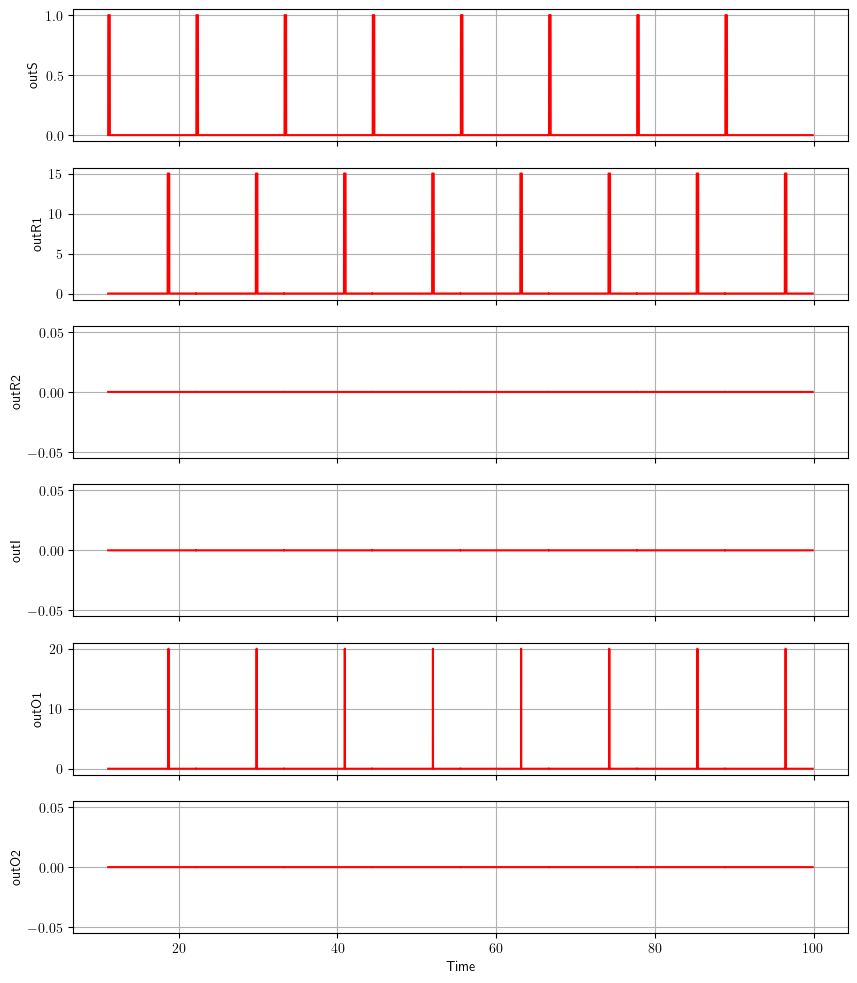

In [11]:
dfPlot(Idf)
# plt.xlim(23,28)

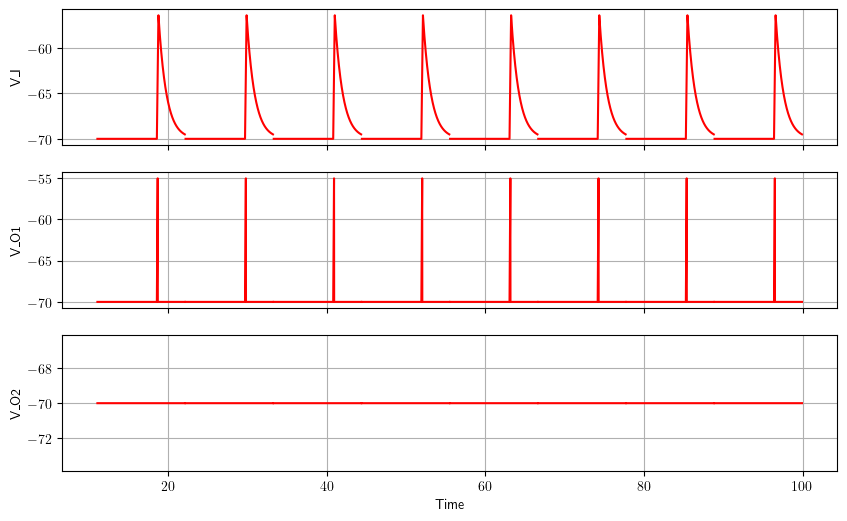

In [12]:
dfPlot(Vdf)